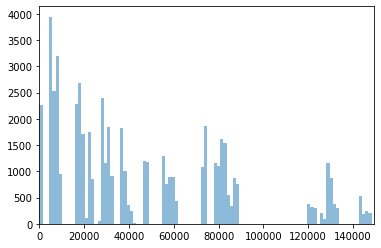

54909


In [1]:
import matplotlib.pyplot as plt
import datetime
import pymongo
import numpy as np
from bson.objectid import ObjectId

client = pymongo.MongoClient()
db = client['PAM2060']
col = db['vision_retries']

now = datetime.datetime.now() - datetime.timedelta(hours=3.5)
from_time = now - datetime.timedelta(hours=12, days=200)
dummy_id = ObjectId.from_datetime(from_time)

pens = list(col.find({'component': 'dosing', "_id": {"$gte": dummy_id}}))
data = np.asarray([(now - pen['_id'].generation_time.replace(tzinfo=None)).total_seconds()/60 for pen in pens])


bin_minute = 60*24
bins = np.arange(0, max(data), bin_minute)

plt.xlim([min(data)-5, max(data)+5])
plt.hist(data, bins=bins, alpha=0.5, weights=(60 / bin_minute)*np.ones_like(data)*24)
plt.show()
print(len(pens))

Duration: 1:04:39.444535
Total: 678
Average Speed: 629 pen/hour
Average Cycle: 57.2 s


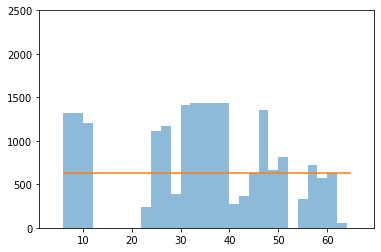

In [1]:
import matplotlib.pyplot as plt
import datetime
import pymongo
import numpy as np
from bson.objectid import ObjectId

client = pymongo.MongoClient()
db = client['PAM2060']
col = db['vision_retries']


now = datetime.datetime.now() - datetime.timedelta(hours=3.5)
from_time = now - datetime.timedelta(hours=10)

dummy_id = ObjectId.from_datetime(from_time)

pens = list(col.find({'component': 'dosing', "_id": {"$gte": dummy_id}}))
data = np.asarray([(now - pen['_id'].generation_time.replace(tzinfo=None)).total_seconds()/60 for pen in pens])


bin_minute = 2
bins = np.arange(0, max(data), bin_minute)


duration = now - pens[0]['_id'].generation_time.replace(tzinfo=None)
average_speed = len(pens)/duration.total_seconds() * 3600
average_cycle = 3600 / average_speed * 10
print(f'Duration:',duration)
print(f'Total: {len(pens)}')
print(f'Average Speed: {int(average_speed)} pen/hour')
print(f'Average Cycle: {average_cycle:.01f} s')


plt.xlim([min(data)-5, max(data)+5])
plt.hist(data, bins=bins, alpha=0.5, weights=(60 / bin_minute)*np.ones_like(data))
plt.plot([data[0], data[-1]], [average_speed] * 2)
plt.ylim(0, 2500)
plt.show()

mean: 14.4
min: 12.6
median: 13.4
spikes: 4.9% (min + 3.6631896479146455)


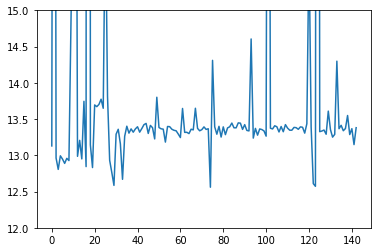

In [7]:
import matplotlib.pyplot as plt
import datetime
import pymongo
import numpy as np
from bson.objectid import ObjectId

client = pymongo.MongoClient()
db = client['PAM2060']
col = db['timing']


now = datetime.datetime.now() - datetime.timedelta(hours=3.5)
from_time = now - datetime.timedelta(hours=10)

dummy_id = ObjectId.from_datetime(from_time)

times = list(col.find({"_id": {"$gte": dummy_id}, "feeder_fill_loop": {"$gt": 1}}))
data = np.asarray([i['feeder_fill_loop'] for i in times])

mean = data.mean()
min_ = data.min()
median = np.median(data)
spikes_th = (mean - min_) * 2

spikes = np.sum(data > (min_ + spikes_th))
spikes_percentage = spikes / len(data) * 100
print(f'mean: {mean:.1f}')
print(f'min: {min_:.1f}')
print(f'median: {median:.1f}')
print(f'spikes: {spikes_percentage:.1f}% (min + {spikes_th})')
plt.plot(data)
plt.ylim(12, 15)
plt.show()

mean: 17.3
min: 11.1
median: 11.9
spikes: 9.7% (min + 12.432184877066774)


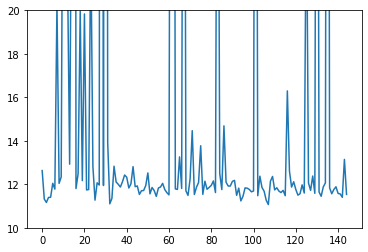

In [9]:
import matplotlib.pyplot as plt
import datetime
import pymongo
import numpy as np
from bson.objectid import ObjectId

client = pymongo.MongoClient()
db = client['PAM2060']
col = db['timing']


now = datetime.datetime.now() - datetime.timedelta(hours=3.5)
from_time = now - datetime.timedelta(hours=10)

dummy_id = ObjectId.from_datetime(from_time)

times = list(col.find({"_id": {"$gte": dummy_id}, "robots": {"$gt": 1}}))
data = np.asarray([i['robots'] for i in times])


mean = data.mean()
min_ = data.min()
median = np.median(data)
spikes_th = (mean - min_) * 2
spikes = np.sum(data > (min_ + spikes_th))
spikes_percentage = spikes / len(data) * 100
print(f'mean: {mean:.1f}')
print(f'min: {min_:.1f}')
print(f'median: {median:.1f}')
print(f'spikes: {spikes_percentage:.1f}% (min + {spikes_th})')
plt.plot(data[:])
plt.ylim(10, 20)
plt.show()